# Searching in a transformed space

In the previous part of the tutorial we set up boundaries and created a method to sample from within those boundaries.
When doing this, we found it useful to replace some parameter values with their logarithm.
In this part of the tutorial we extend this log-transformation approach to the optimisation routine, so that we search in a (partly) log-transformed space.

## Why transform the search space?

Before performing parameter estimation it _can_ be a good idea to perform some kind of transformations on the search space.
For example, some optimisation methods don't perform well on spaces where the error measure varies very rapidly in one direction, but slowly in another.
In these cases it might help to rescale the parameters, e.g. so that they are all restricted to the interval $[0, 1]$.


In 

[Beattie et al. 2017](https://doi.org/10.1113/JP275733)

Show some complex figure, then add a few log-transforms to it, watch it calm down?


In [1]:
import matplotlib.pyplot as plt
import myokit
import myokit.lib.hh
import numpy as np
import pints

from library import ModelHHSolver as Model

In [2]:
# Load a protocol and create a foward model instance
protocol = myokit.load_protocol('resources/simplified-staircase.mmt')
model = Model(protocol)

# Define a parameter vector
parameters = np.array([3e-4, 0.07, 3e-5, 0.05, 0.09, 9e-2, 5e-3, 0.03, 0.2])

# Set up a synthetic data example
times = np.arange(0, 15400, 0.1)
values = model.simulate(parameters, times)
values += np.random.normal(0, 0.015, times.shape)
problem = pints.SingleOutputProblem(model, times, values)
error = pints.MeanSquaredError(problem)

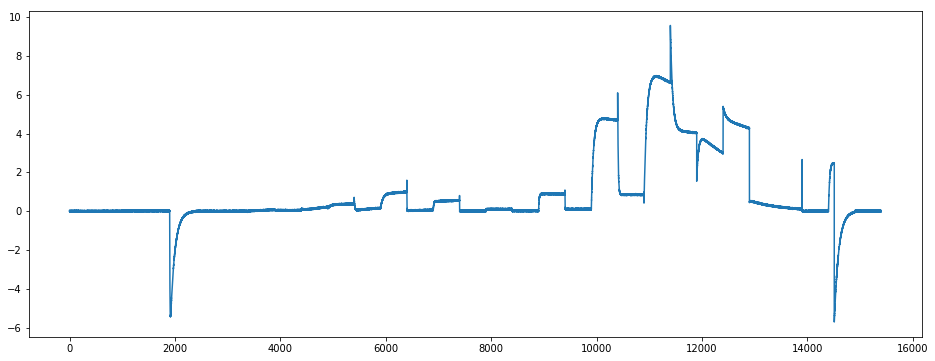

In [3]:
plt.figure(figsize=(16, 6))
plt.plot(times, values)
plt.show()

In [4]:
import pints.plot

from library import Boundaries
from library import multivariate_boundary_plot as boundary_plot

b = Boundaries(g_min = 0.1)

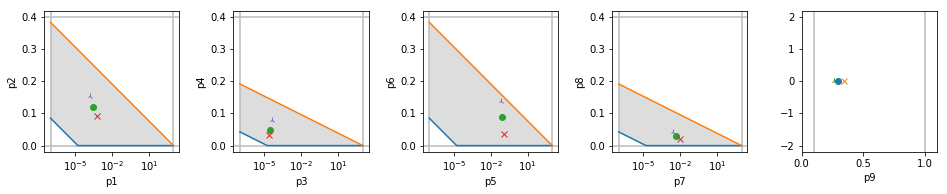

In [92]:
parameters = np.array([3e-4, 0.12, 3e-5, 0.05, 0.09, 9e-2, 5e-3, 0.03, 0.3])
x1 = np.array([5.9e-4, 9.3e-2, 2.41e-5, 3.20e-2, 1.29e-1, 3.46e-2, 1.03e-2, 2.18e-2, 3.43e-1])
x2 = np.array([1.53e-4, 0.155, 3.74e-5, 7.81e-2, 6.28e-2, 0.14, 2.4e-3, 4.12e-2, 2.6e-1])
ax1, ax2, ax3, ax4, ax5 = boundary_plot(a_log=True)

ax1.plot(parameters[0], parameters[1], 'o')
ax2.plot(parameters[2], parameters[3], 'o')
ax3.plot(parameters[4], parameters[5], 'o')
ax4.plot(parameters[6], parameters[7], 'o')
ax5.plot(parameters[8], 0, 'o')

ax1.plot(x1[0], x1[1], 'x')
ax2.plot(x1[2], x1[3], 'x')
ax3.plot(x1[4], x1[5], 'x')
ax4.plot(x1[6], x1[7], 'x')
ax5.plot(x1[8], 0, 'x')

ax1.plot(x2[0], x2[1], '2')
ax2.plot(x2[2], x2[3], '2')
ax3.plot(x2[4], x2[5], '2')
ax4.plot(x2[6], x2[7], '2')
ax5.plot(x2[8], 0, '2')
plt.show()

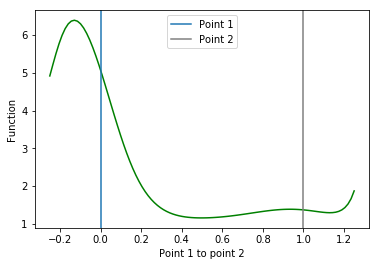

In [97]:
fig, ax = pints.plot.function_between_points(error, x1, x2, evaluations=100)
plt.show()


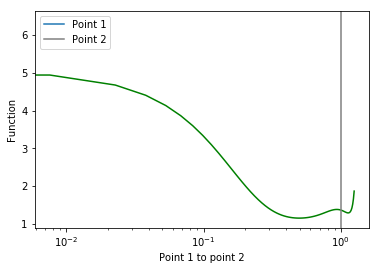

In [95]:
fig, ax = pints.plot.function_between_points(error, x1, x2, evaluations=100)
ax.set_xscale('log')
plt.show()

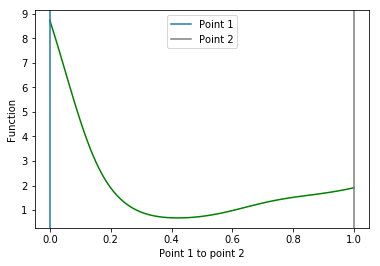

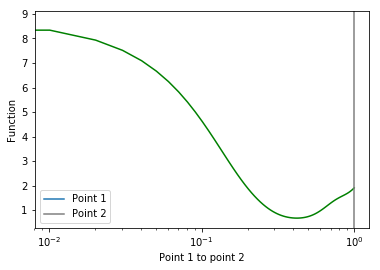

In [102]:
np.random.seed(3)
d = 2**np.random.normal(0, 0.6, size=9)
parameters = np.array([3e-4, 0.12, 3e-5, 0.05, 0.09, 9e-2, 5e-3, 0.03, 0.3])
x1 = parameters * d
x2 = parameters / d

fig, ax = pints.plot.function_between_points(error, x1, x2, padding=0, evaluations=100)
fig, ax = pints.plot.function_between_points(error, x1, x2, padding=0, evaluations=100)
ax.set_xscale('log')
plt.show()



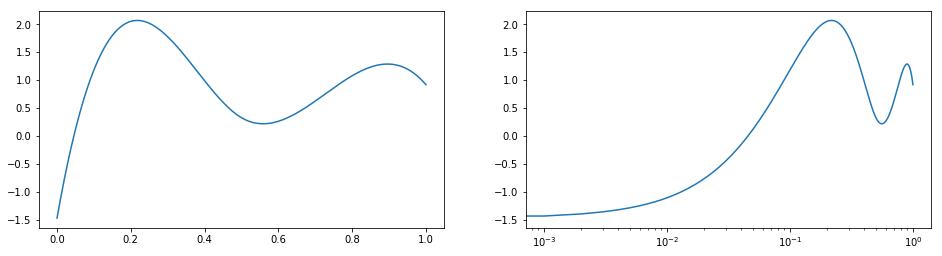

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

n_points = 5
x = np.linspace(0, 1, n_points)
y = np.random.normal(0, 1, size=x.shape)
splrep = interpolate.splrep(x, y, s=0)
x = np.linspace(0, 1, 1000)
y = interpolate.splev(x, splrep, der=0)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y)
ax = fig.add_subplot(1, 2, 2)
ax.set_xscale('log')
ax.plot(x, y)

plt.show()

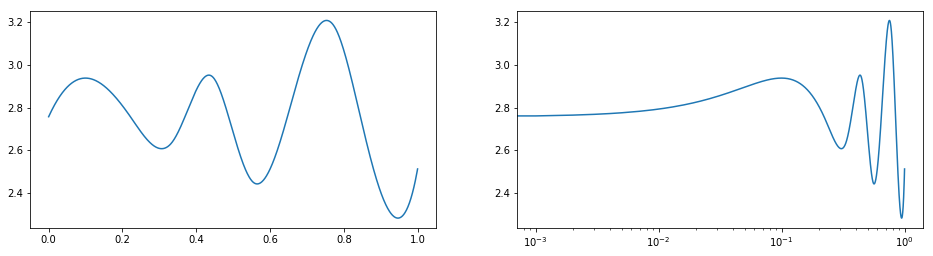

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

n_points = 10
x = np.linspace(0, 1, n_points)
y = np.exp(np.random.normal(0, 0.1, size=x.shape))
splrep = interpolate.splrep(x, y, s=0)
x = np.linspace(0, 1, 1000)
y = np.exp(interpolate.splev(x, splrep, der=0))

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y)
ax = fig.add_subplot(1, 2, 2)
ax.set_xscale('log')
ax.plot(x, y)

plt.show()

In [ ]:
class ErrorForPlotting(pints.ErrorMeasure):
    def __call__(self, x):
        return np.log(np.log(error(x)))
    def n_parameters(self):
        return error.n_parameters()

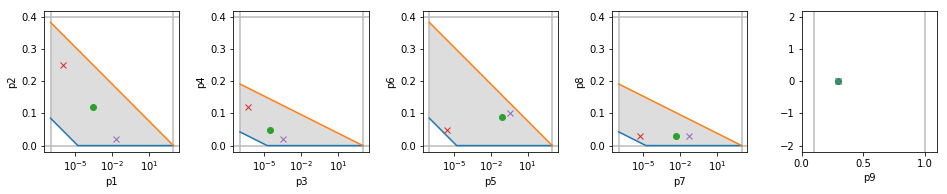

In [60]:
x1 = parameters
x2 = parameters

parameters = np.array([3e-4, 0.12, 3e-5, 0.05, 0.09, 9e-2, 5e-3, 0.03, 0.3])
x1 = np.array([1e-6, 0.25, 5e-7, 0.12, 3e-6, 0.05, 5e-6, 0.03, 0.3])
x2 = np.array([0.02, 0.02, 3e-4, 0.02, 0.4, 0.1, 5e-2, 0.03, 0.3])

ax1, ax2, ax3, ax4, ax5 = boundary_plot(a_log=True)

ax1.plot(parameters[0], parameters[1], 'o')
ax2.plot(parameters[2], parameters[3], 'o')
ax3.plot(parameters[4], parameters[5], 'o')
ax4.plot(parameters[6], parameters[7], 'o')
ax5.plot(parameters[8], 0, 'o')

ax1.plot(x1[0], x1[1], 'x')
ax2.plot(x1[2], x1[3], 'x')
ax3.plot(x1[4], x1[5], 'x')
ax4.plot(x1[6], x1[7], 'x')
ax5.plot(x1[8], 0, 'x')

ax1.plot(x2[0], x2[1], 'x')
ax2.plot(x2[2], x2[3], 'x')
ax3.plot(x2[4], x2[5], 'x')
ax4.plot(x2[6], x2[7], 'x')
ax5.plot(x2[8], 0, 'x')

plt.show()

<string>:14: RuntimeWarning: overflow encountered in multiply


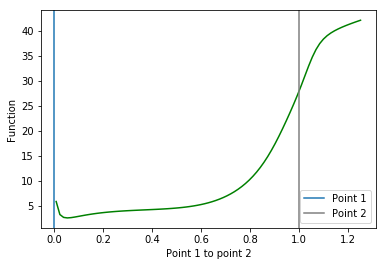

In [61]:
pints.plot.function_between_points(error, x1, x2, evaluations=100)

plt.show()

## Implementing

In [7]:
# Example code, based on four-ways code

## Summary